# Iterative Imputation

In [52]:
import os
os.chdir("C:\\Users\\amanr\\OneDrive\\Desktop\\")

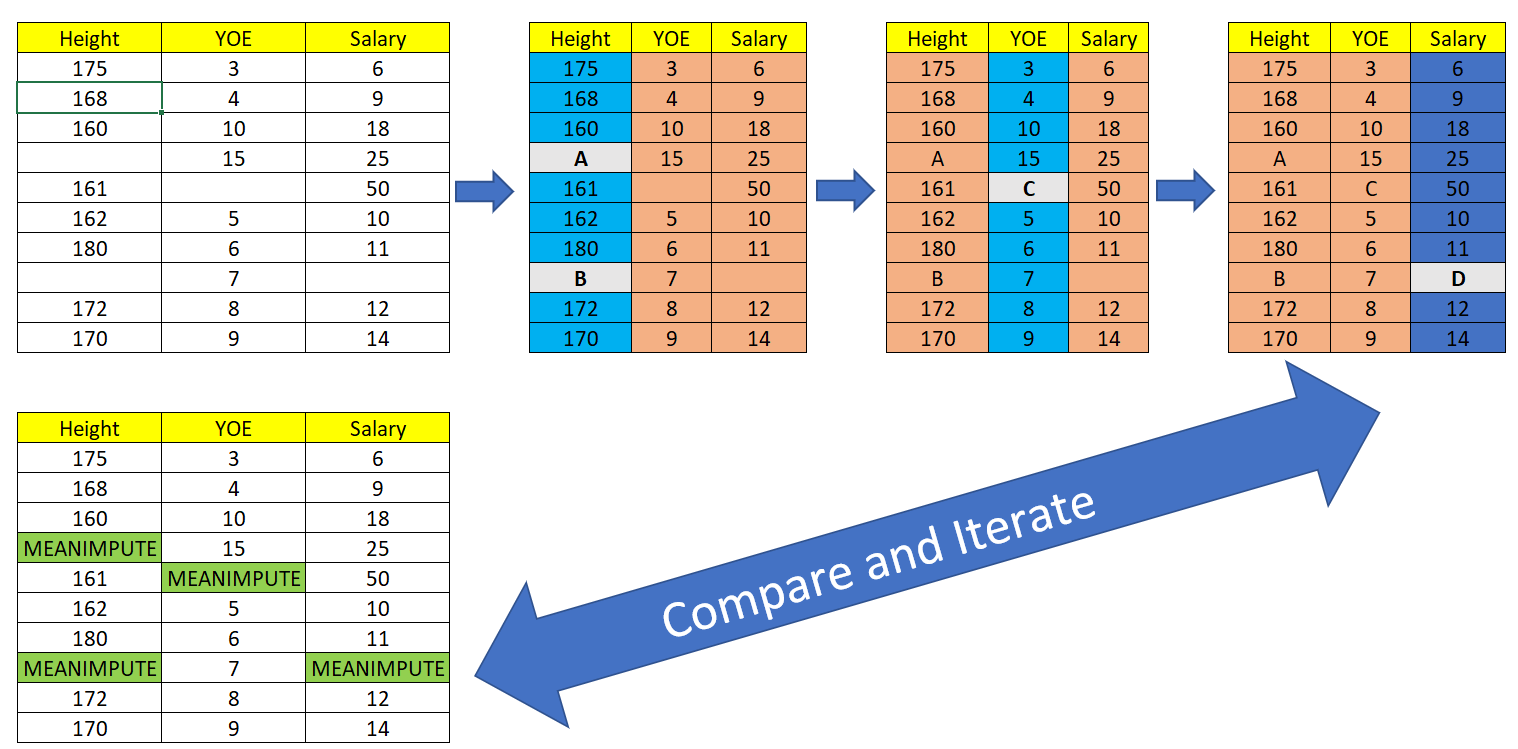

In [53]:
# import image module
from IPython.display import Image
  
# get the image
Image(filename="sp.png")

In [72]:
import pandas as pd
MyData = pd.read_excel("MySimpleData.xlsx",sheet_name="Sheet2")

In [73]:
MyData.head(20)

,Height,YOE,Salary
0,175.0,3.0,6.0
1,168.0,4.0,9.0
2,160.0,10.0,18.0
3,NaN,15.0,25.0
4,161.0,NaN,50.0
5,162.0,5.0,10.0
6,180.0,6.0,11.0
7,NaN,7.0,NaN
8,172.0,8.0,12.0
9,170.0,9.0,14.0


In [74]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression


In [75]:
linearreg = LinearRegression()
imp = IterativeImputer(estimator=linearreg,missing_values=np.nan, max_iter=5, verbose=2, imputation_order='roman',random_state=0)
ImputedData=imp.fit_transform(MyData)

[IterativeImputer] Completing matrix with shape (10, 3)
[IterativeImputer] Ending imputation round 1/5, elapsed time 0.01
[IterativeImputer] Change: 22.357247084462237, scaled tolerance: 0.18 
[IterativeImputer] Ending imputation round 2/5, elapsed time 0.01
[IterativeImputer] Change: 5.4504715088284, scaled tolerance: 0.18 
[IterativeImputer] Ending imputation round 3/5, elapsed time 0.02
[IterativeImputer] Change: 1.9959603940512807, scaled tolerance: 0.18 
[IterativeImputer] Ending imputation round 4/5, elapsed time 0.03
[IterativeImputer] Change: 0.3486270765417885, scaled tolerance: 0.18 
[IterativeImputer] Ending imputation round 5/5, elapsed time 0.04
[IterativeImputer] Change: 0.06542726935151677, scaled tolerance: 0.18 
[IterativeImputer] Early stopping criterion reached.


In [77]:
pd.DataFrame(ImputedData)

,0,1,2
0,175.000000,3.000000,6.00000
1,168.000000,4.000000,9.00000
2,160.000000,10.000000,18.00000
3,164.716065,15.000000,25.00000
4,161.000000,31.848964,50.00000
5,162.000000,5.000000,10.00000
6,180.000000,6.000000,11.00000
7,169.325576,7.000000,12.37321
8,172.000000,8.000000,12.00000
9,170.000000,9.000000,14.00000


In [59]:
#Interesting feature - initial_strategy, imputation_order

#  Explore MICE  Multiple Imputation by Chained Equations 

In [78]:
# Create kernel. 
import miceforest as mf
MyData = pd.read_excel("MySimpleData.xlsx",sheet_name="Sheet2")
kds = mf.ImputationKernel(
  MyData,
  datasets=5,
  save_all_iterations=True,
  random_state=11
)

# Run the MICE algorithm for 6 iterations
kds.mice(6)

In [82]:
kds.complete_data(0)
Finalresults = pd.concat([kds.complete_data(i) for i in range(5)]).groupby(level=0).mean()

In [83]:
Finalresults

,Height,YOE,Salary
0,175.0,3.0,6.0
1,168.0,4.0,9.0
2,160.0,10.0,18.0
3,162.4,15.0,25.0
4,161.0,7.8,50.0
5,162.0,5.0,10.0
6,180.0,6.0,11.0
7,174.4,7.0,11.8
8,172.0,8.0,12.0
9,170.0,9.0,14.0


# Model Based Imputation - KNN

In [84]:
from sklearn.impute import KNNImputer
MyData = pd.read_excel("MySimpleData.xlsx",sheet_name="Sheet2")
knn = KNNImputer(n_neighbors=2)

In [85]:
knn.fit_transform(MyData)

array([[175. ,   3. ,   6. ],
       [168. ,   4. ,   9. ],
       [160. ,  10. ,  18. ],
       [165. ,  15. ,  25. ],
       [161. ,  12.5,  50. ],
       [162. ,   5. ,  10. ],
       [180. ,   6. ,  11. ],
       [176. ,   7. ,  11.5],
       [172. ,   8. ,  12. ],
       [170. ,   9. ,  14. ]])

# Model Based Imputation - RandomForest

In [64]:
!pip install missingpy

In [86]:
#from missingpy import MissForest

# Make an instance and perform the imputation
imputer = MissForest()
MyData = pd.read_excel("MySimpleData.xlsx",sheet_name="Sheet2")
X_imputed = imputer.fit_transform(MyData)
X_imputed

Iteration: 0
Iteration: 1
Iteration: 2


array([[175.  ,   3.  ,   6.  ],
       [168.  ,   4.  ,   9.  ],
       [160.  ,  10.  ,  18.  ],
       [162.33,  15.  ,  25.  ],
       [161.  ,  13.16,  50.  ],
       [162.  ,   5.  ,  10.  ],
       [180.  ,   6.  ,  11.  ],
       [175.92,   7.  ,  10.97],
       [172.  ,   8.  ,  12.  ],
       [170.  ,   9.  ,  14.  ]])

In [87]:
pd.DataFrame(X_imputed)

,0,1,2
0,175.00,3.00,6.00
1,168.00,4.00,9.00
2,160.00,10.00,18.00
3,162.33,15.00,25.00
4,161.00,13.16,50.00
5,162.00,5.00,10.00
6,180.00,6.00,11.00
7,175.92,7.00,10.97
8,172.00,8.00,12.00
9,170.00,9.00,14.00


# Listwise Deletion

In [90]:
MyData = pd.read_excel("MySimpleData.xlsx",sheet_name="Sheet2")
MyData = MyData.dropna(axis=0)

In [91]:
MyData

,Height,YOE,Salary
0,175.0,3.0,6.0
1,168.0,4.0,9.0
2,160.0,10.0,18.0
5,162.0,5.0,10.0
6,180.0,6.0,11.0
8,172.0,8.0,12.0
9,170.0,9.0,14.0


In [67]:
MyData

,Height,YOE,Salary
0,175.0,3.0,6.0
1,168.0,4.0,9.0
2,160.0,10.0,18.0
5,162.0,5.0,10.0
6,180.0,6.0,11.0
8,172.0,8.0,12.0
9,170.0,9.0,14.0


# Mean - Median - Mode Imputation

In [102]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [103]:
MyData = pd.read_excel("MySimpleData.xlsx",sheet_name="Sheet2")
MyDataImputed = imp_mean.fit_transform(MyData)

In [104]:
MyDataImputed

array([[175.        ,   3.        ,   6.        ],
       [168.        ,   4.        ,   9.        ],
       [160.        ,  10.        ,  18.        ],
       [168.5       ,  15.        ,  25.        ],
       [161.        ,   7.44444444,  50.        ],
       [162.        ,   5.        ,  10.        ],
       [180.        ,   6.        ,  11.        ],
       [168.5       ,   7.        ,  17.22222222],
       [172.        ,   8.        ,  12.        ],
       [170.        ,   9.        ,  14.        ]])

# Deck Imputation - Home work for you

In [71]:
#Find nearest neighbours based on feature on your choice
#Impute using your favourate simpleImputer
#Run through loop for all missing value